In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'C:\\Users\\LENOVO\\Documents\\SENECA-BUSINESS ANALITICS PG\\2do Semestre\\BAN200-Sentiment analysis and Text Mining\\Python practices'

In [3]:
#Importing the data
file = 'Air quality_RM.xls'
df = pd.read_excel(file)

print (file)

Air quality_RM.xls


In [4]:
f_airquality = pd.read_excel('Air quality_RM.xls', 'Air quality RM')
f_airquality

,Month,Year,Unit of measurement,Value
0,1,2009,µg/m3,20.0
1,2,2009,µg/m3,20.0
2,3,2009,µg/m3,23.0
3,4,2009,µg/m3,30.0
4,5,2009,µg/m3,41.0
...,...,...,...,...
118,8,2019,µg/m3,33.0
119,9,2019,µg/m3,17.0
120,10,2019,µg/m3,17.0
121,11,2019,µg/m3,13.0


In the original file dates are separates in months and years, to combine year and month in one column it is done the following steps.

In [5]:
df['Value'] = pd.to_numeric(df['Value'],errors='coerce')

In [6]:
import datetime

In [7]:
df['dateInt']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2)
df['Date'] = pd.to_datetime(df['dateInt'], format='%Y%m')
pd.options.display.float_format = '{:.2f}'.format
df

,Month,Year,Unit of measurement,Value,dateInt,Date
0,1,2009,µg/m3,20.00,200901,2009-01-01
1,2,2009,µg/m3,20.00,200902,2009-02-01
2,3,2009,µg/m3,23.00,200903,2009-03-01
3,4,2009,µg/m3,30.00,200904,2009-04-01
4,5,2009,µg/m3,41.00,200905,2009-05-01
...,...,...,...,...,...,...
118,8,2019,µg/m3,33.00,201908,2019-08-01
119,9,2019,µg/m3,17.00,201909,2019-09-01
120,10,2019,µg/m3,17.00,201910,2019-10-01
121,11,2019,µg/m3,13.00,201911,2019-11-01


# **Analyzing the raw data**

## REVIEW and INCLUDE DEFINTION OF µg/m3

The air quality in RM is measuring with  µg/m3, which is the smallest particules

In [8]:
f_airquality = df[['Value', 'Date']]
pd.options.display.float_format = '{:.2f}'.format

print(f_airquality)

     Value       Date
0    20.00 2009-01-01
1    20.00 2009-02-01
2    23.00 2009-03-01
3    30.00 2009-04-01
4    41.00 2009-05-01
..     ...        ...
118  33.00 2019-08-01
119  17.00 2019-09-01
120  17.00 2019-10-01
121  13.00 2019-11-01
122  16.00 2019-12-01

[123 rows x 2 columns]


In [9]:
f_airquality.dtypes

Value           float64
Date     datetime64[ns]
dtype: object

Note: To analyze time series is important to have the right form, therefore the next step is to do that.  

In [10]:
#value method: to conver from a dataframe to series
series_value = f_airquality.values

In [11]:
series_value

array([[20.0, Timestamp('2009-01-01 00:00:00')],
       [20.0, Timestamp('2009-02-01 00:00:00')],
       [23.0, Timestamp('2009-03-01 00:00:00')],
       [30.0, Timestamp('2009-04-01 00:00:00')],
       [41.0, Timestamp('2009-05-01 00:00:00')],
       [48.0, Timestamp('2009-06-01 00:00:00')],
       [44.0, Timestamp('2009-07-01 00:00:00')],
       [33.0, Timestamp('2009-08-01 00:00:00')],
       [24.0, Timestamp('2009-09-01 00:00:00')],
       [19.0, Timestamp('2009-10-01 00:00:00')],
       [14.0, Timestamp('2009-11-01 00:00:00')],
       [19.0, Timestamp('2009-12-01 00:00:00')],
       [21.0, Timestamp('2010-01-01 00:00:00')],
       [17.0, Timestamp('2010-02-01 00:00:00')],
       [24.0, Timestamp('2010-03-01 00:00:00')],
       [35.0, Timestamp('2010-04-01 00:00:00')],
       [43.0, Timestamp('2010-05-01 00:00:00')],
       [48.0, Timestamp('2010-06-01 00:00:00')],
       [45.0, Timestamp('2010-07-01 00:00:00')],
       [36.0, Timestamp('2010-08-01 00:00:00')],
       [21.0, Timest

In [12]:
type(series_value)

numpy.ndarray

In [13]:
f_airquality. tail

<bound method NDFrame.tail of      Value       Date
0    20.00 2009-01-01
1    20.00 2009-02-01
2    23.00 2009-03-01
3    30.00 2009-04-01
4    41.00 2009-05-01
..     ...        ...
118  33.00 2019-08-01
119  17.00 2019-09-01
120  17.00 2019-10-01
121  13.00 2019-11-01
122  16.00 2019-12-01

[123 rows x 2 columns]>

In [14]:
# Reviewing the stats 
f_airquality. describe()

,Value
count,123.00
mean,29.49
std,13.98
min,12.00
25%,18.20
50%,25.00
75%,40.00
max,69.00


stast analysis: include analysis of mean and std

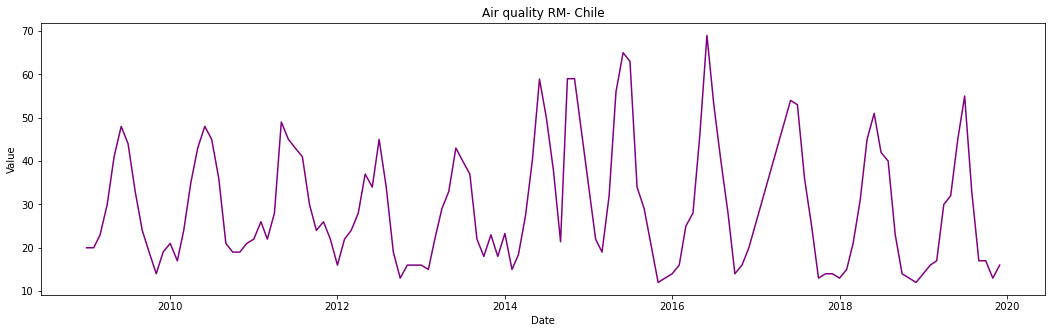

In [15]:
# Create figure and plot space
fig,ax=plt.subplots(figsize=(18,5))

#Import libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

#Add x-axis and y-axis
ax.plot(f_airquality['Date'],
        f_airquality['Value'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel='Date',
       ylabel='Value',
       title='Air quality RM- Chile')

plt.show()

In [16]:
f_airquality.set_index('Date', inplace=True) #in order to have dates as index, otherwise the index will be numbers

In [17]:
#calculating moving average: in order to remove the noise and learn if there is a tendency. help to smoth the time series. 
f_airquality_mean = f_airquality.rolling(window=20).mean()

In [18]:
print(f_airquality_mean.head(10))

            Value
Date             
2009-01-01    NaN
2009-02-01    NaN
2009-03-01    NaN
2009-04-01    NaN
2009-05-01    NaN
2009-06-01    NaN
2009-07-01    NaN
2009-08-01    NaN
2009-09-01    NaN
2009-10-01    NaN


<AxesSubplot:title={'center':'Moving Mean'}, xlabel='Date'>

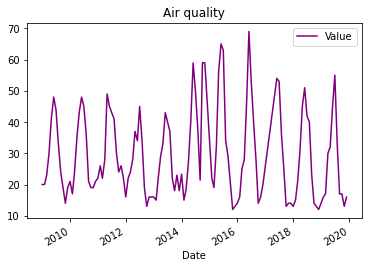

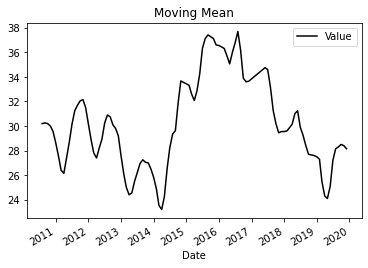

In [19]:
f_airquality.plot(color='purple', xlabel='Date', title = 'Air quality')
f_airquality_mean.plot (color='black', xlabel='Date', title='Moving Mean')

# Dividing data on training and testing basis

Training set: these data will be the main basis for defining the coefficients / parameters of the model;

Test set: ## These are the data that will be separated and not seen by the model and will be used to test if the model works (generally these values are compared with a walk forward method and finally the mean error is measured).

* it will reserve the last 24 months of data to test the model. All previous data will be used for the training data. 



In [20]:
from matplotlib import pyplot
X = f_airquality.values
Months=24
train = f_airquality.iloc[:-Months,0:1].copy()
test = f_airquality.iloc[-Months:,0:1].copy()

print('Observations: %d' % (len(X)))
print('Train: %d' % (len(train)))
print('Test: %d' % (len(test)))



Observations: 123
Train: 99
Test: 24


* after this code the date passed to be observation, which means 123 months

In [21]:
#plot test and training set
plt.figure(figsize=(18,5))
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt



<Figure size 1296x360 with 0 Axes>

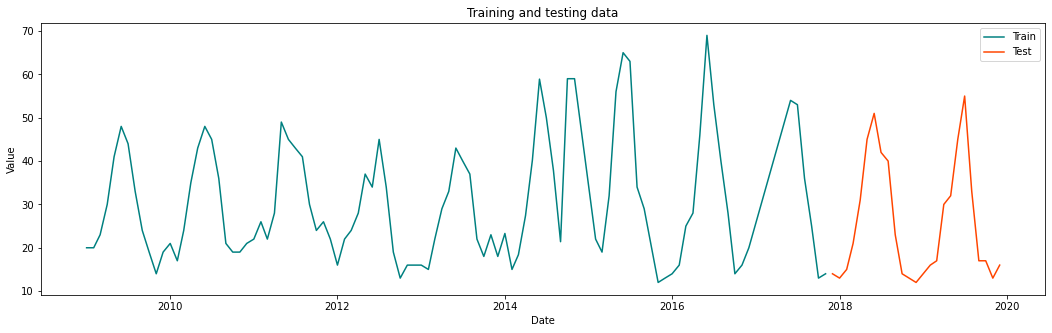

In [22]:
month = 24
train = f_airquality.iloc[:-month,0:1].copy()
test = f_airquality.iloc[-month:,0:1].copy()
plt.figure(figsize=(18,5))
plt.title('Training and testing data')
plt.plot(train['Value'], color='teal')
plt.plot(test['Value'], color='orangered')
plt.legend(['Train','Test'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Stationarity test and verifying correlated lags

In order to create a time series forecast it is necessary that the series is stationary, that is, it has the following relatively constant conditions: mean, variance and autocorrelation.

* To check stationary is used Dickey Fuller 

In [23]:
#Creating a Seaborn Distplot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import sqrt


In [24]:
#creating a function to plot the graph and show the test result:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)
    
    y.plot(ax=ax1, figsize=figsize, color='teal')
    ax1.set_title('Air quality_RM')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2, color='teal');
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3, method='ols', color='teal');
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4, color='teal')
    ax4.set_title('Value Distribution')

    plt.tight_layout()

    print('Dickey-Fuller test results:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Statistical Test','P-Value','Used Lags','Observations Number'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Values (%s)"%key] = value.round(4)
        
    print(adftest)

Dickey-Fuller test results:
Statistical Test        -6.50
P-Value                  0.00
Used Lags                1.00
Observations Number     97.00
Critical Values (1%)    -3.50
Critical Values (5%)    -2.89
Critical Values (10%)   -2.58
dtype: float64


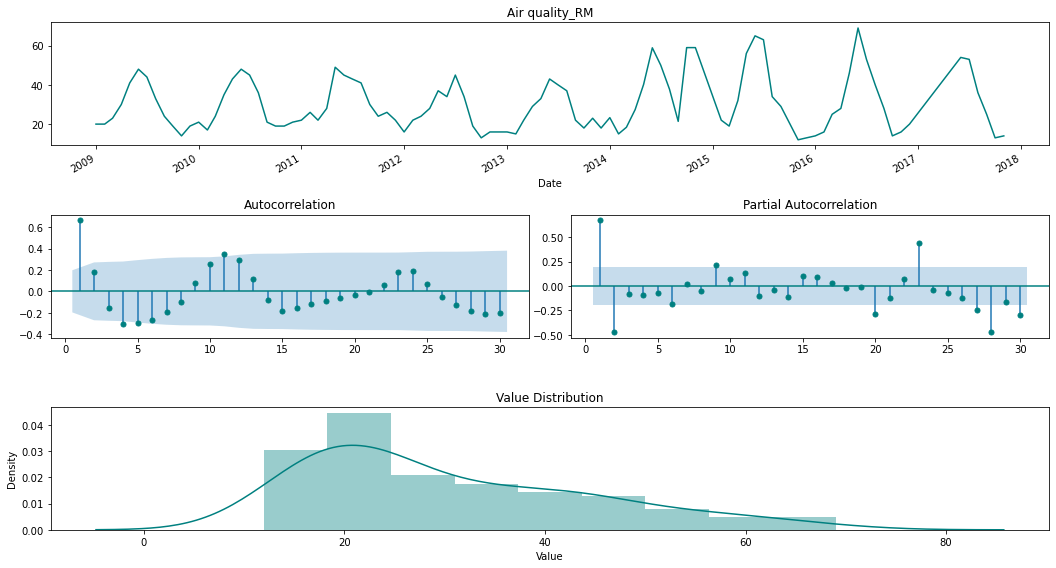

In [25]:
check_stationarity(train['Value'], lags_plots=30)

# Reviewing results:

To verify if the values on the training data are stationary, we will use the P value of 5% as a basis, if the P-value of this test is less than 5% we may consider the series as stationary.

Augmented Dickey-Fuller test
p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

*P-Value: 0.00 < 0.05. Therefore, the value of the training data are stationary*

*Positive skewn*

*Statistical values informs that the P value was 0.00*

# Creating Model:
It is going to be used th ARIMA model. 

"Initially the model will be created based on the training data, thus, the coefficients for the 3 auto correlated lags will be generated and will serve to test the extrapolation of 5 consecutive days in the test set".

"There are several ways to make extrapolations for the future, the main ones are:

  *Create a model for each specific day to be forecasted and add everything later in a final model*,   Recursive, forecasting the first day and use this value as a basis to forecast the next day.   We will use the last model in this example, in this case we will forecast the next 5 days, compare with real data, add the latter to the model in order to make a new extrapolation, later we will calculate the error of the model and analyze relevant facts of the forecast".
  
  
  The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.


**First, we fit an ARIMA(5,1,0) model**. 
This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

In [26]:
# Training the model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(5,1,0)).fit() 
train_pred = model.predict()



In [27]:
#difference with previous period
df=train_pred.diff(periods=-1)
print(df)

Date
2009-01-01   -20.00
2009-02-01     0.00
2009-03-01    -3.84
2009-04-01    -7.15
2009-05-01    -9.98
              ...  
2017-07-01    17.60
2017-08-01    17.92
2017-09-01     4.93
2017-10-01     7.33
2017-11-01      NaN
Name: predicted_mean, Length: 99, dtype: float64


In [28]:
# Returning the value with above calculation
df[0] += train.iloc[0,0]
df = np.cumsum(df)
df.head()

Date
2009-01-01    -0.00
2009-02-01     0.00
2009-03-01    -3.84
2009-04-01   -10.99
2009-05-01   -20.98
Name: predicted_mean, dtype: float64

In [29]:
# Returning the value 
train_pred[0] += train.iloc[0,0]
train_pred = np.cumsum(train_pred)
train_pred.head()

Date
2009-01-01    20.00
2009-02-01    40.00
2009-03-01    60.00
2009-04-01    83.84
2009-05-01   114.83
Name: predicted_mean, dtype: float64

In [30]:
train['Value_pred'] = train_pred
train.dropna(inplace=True)
train.head()

,Value,Value_pred
Date,,
2009-01-01,20.00,20.00
2009-02-01,20.00,40.00
2009-03-01,23.00,60.00
2009-04-01,30.00,83.84
2009-05-01,41.00,114.83


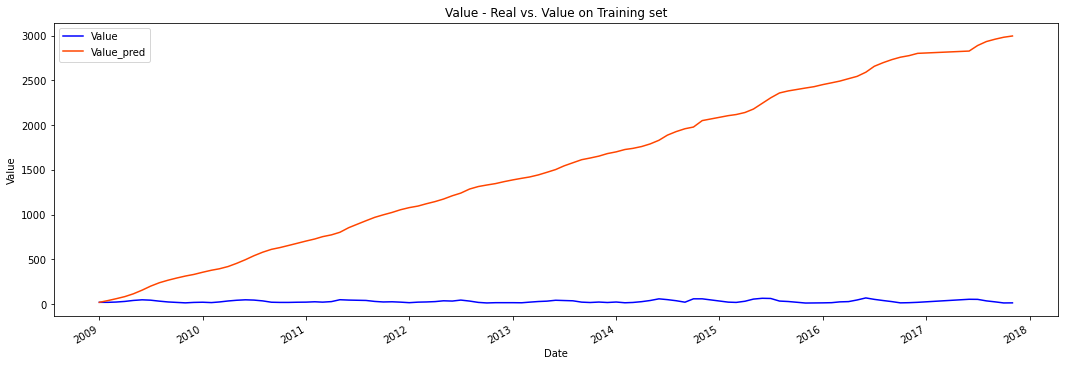

In [31]:
# Plotting the graph
train.plot(figsize=(18,6), 
            title='Value - Real vs. Value on Training set',
           color=['b','orangered'])
plt.ylabel('Value')
plt.show()